In [89]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [90]:
df_raw = pd.read_csv(r"C:\Users\rados\OneDrive - SGH\Semestr 8\data_science_w_biz_2\projekt_churn_bank\BankChurners.csv")
df = df_raw.copy()

In [91]:
print(df_raw.columns)
df.Dependent_count.unique()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


array([3, 5, 4, 2, 0, 1], dtype=int64)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [93]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'],axis= 1,inplace=True)

In [94]:
df.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Tranform data - convert category column to binary columns

In [95]:
# How OneHotEncoder works?
from sklearn.preprocessing import OneHotEncoder

# your initial dataframe
df_ex = pd.DataFrame({
    'color': ['blue', 'green', 'red', 'blue', 'green', 'green']
})

# create the OneHotEncoder
enc = OneHotEncoder(sparse_output=False)

# fit and transform the color column
color_transformed = enc.fit_transform(df_ex[['color']])

# get feature names
feature_names = enc.get_feature_names_out(['color'])

# create a new dataframe with the transformed columns
df_transformed = pd.DataFrame(color_transformed, columns=feature_names)

print(df_transformed)

   color_blue  color_green  color_red
0         1.0          0.0        0.0
1         0.0          1.0        0.0
2         0.0          0.0        1.0
3         1.0          0.0        0.0
4         0.0          1.0        0.0
5         0.0          1.0        0.0


In [96]:
for column in df.select_dtypes(include = ["object"]).columns:
    [print(column, x) for x in df[column].unique()]

Attrition_Flag Existing Customer
Attrition_Flag Attrited Customer
Gender M
Gender F
Education_Level High School
Education_Level Graduate
Education_Level Uneducated
Education_Level Unknown
Education_Level College
Education_Level Post-Graduate
Education_Level Doctorate
Marital_Status Married
Marital_Status Single
Marital_Status Unknown
Marital_Status Divorced
Income_Category $60K - $80K
Income_Category Less than $40K
Income_Category $80K - $120K
Income_Category $40K - $60K
Income_Category $120K +
Income_Category Unknown
Card_Category Blue
Card_Category Gold
Card_Category Silver
Card_Category Platinum


In [97]:
# df = df_temp.copy()
# df_temp = df.copy()
for column in df.select_dtypes(include = ["object"]).columns:
    df[column] = df[column].str.replace("-|\s\+|\$", "", regex = True)
    df[column] = df[column].str.replace("\s+", "_", regex = True)
    [print(column, x) for x in df[column].unique()]

Attrition_Flag Existing_Customer
Attrition_Flag Attrited_Customer
Gender M
Gender F
Education_Level High_School
Education_Level Graduate
Education_Level Uneducated
Education_Level Unknown
Education_Level College
Education_Level PostGraduate
Education_Level Doctorate
Marital_Status Married
Marital_Status Single
Marital_Status Unknown
Marital_Status Divorced
Income_Category 60K_80K
Income_Category Less_than_40K
Income_Category 80K_120K
Income_Category 40K_60K
Income_Category 120K
Income_Category Unknown
Card_Category Blue
Card_Category Gold
Card_Category Silver
Card_Category Platinum


In [98]:
df_temp = df.copy()
for column in df.select_dtypes(include = ["object"]).columns:
    # create the OneHotEncoder
    enc = OneHotEncoder(sparse_output=False)

    # fit and transform the color column
    transormed = enc.fit_transform(df[[column]])

    # get feature names
    feature_names = enc.get_feature_names_out([column])

    # create a new dataframe with the transformed columns
    df_transformed = pd.DataFrame(transormed, columns=feature_names)
    df = pd.concat([df, df_transformed.astype("Int64")], axis = 1)
    

In [99]:
df.drop(df.select_dtypes(include = ["object"]).columns, axis = 1, inplace = True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CLIENTNUM                         10127 non-null  int64  
 1   Customer_Age                      10127 non-null  int64  
 2   Dependent_count                   10127 non-null  int64  
 3   Months_on_book                    10127 non-null  int64  
 4   Total_Relationship_Count          10127 non-null  int64  
 5   Months_Inactive_12_mon            10127 non-null  int64  
 6   Contacts_Count_12_mon             10127 non-null  int64  
 7   Credit_Limit                      10127 non-null  float64
 8   Total_Revolving_Bal               10127 non-null  int64  
 9   Avg_Open_To_Buy                   10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 11  Total_Trans_Amt                   10127 non-null  int64  
 12  Tota

### EDA - explore data a bit before modeling

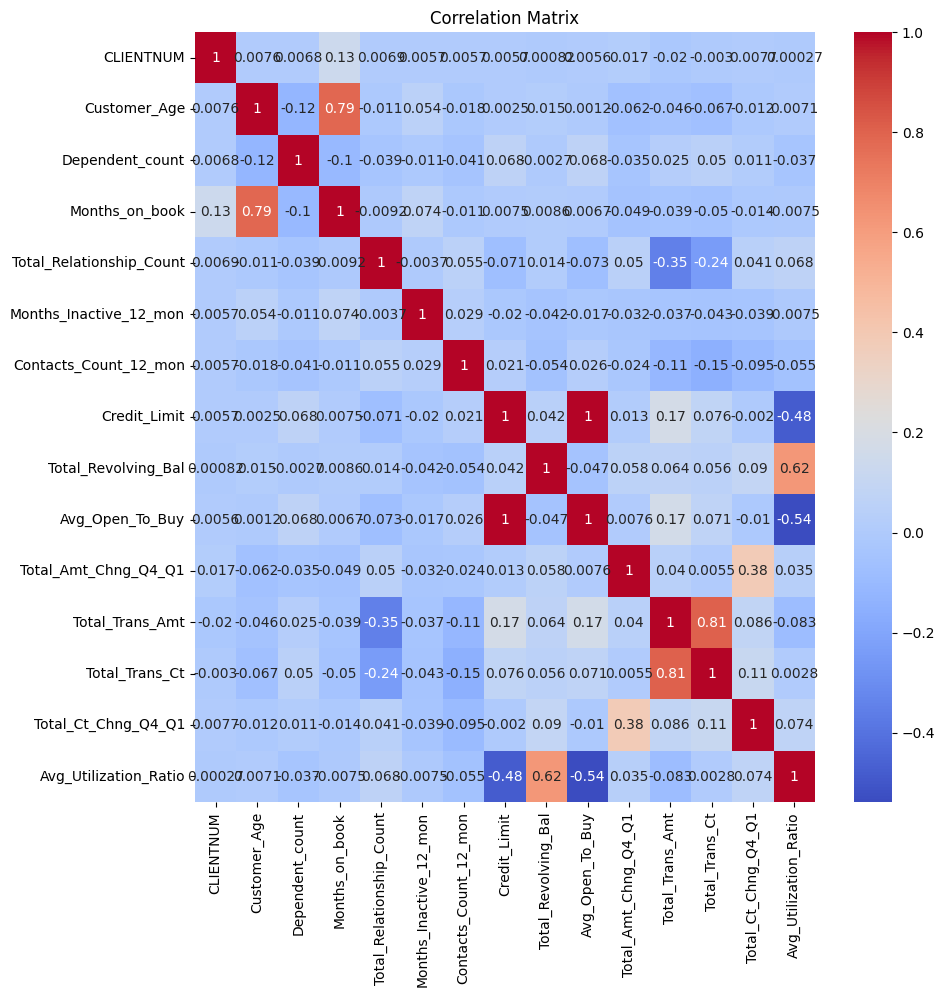

In [112]:
### let's chjeck correlation matrix
columns_for_corr = [col for col in df.columns if len(df[col].unique()) > 2]
# print(columns_for_corr)
df_corr = df[columns_for_corr].corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [115]:
# colinearity detected - remove columns which are unnecessary
columns_to_drop = []
columns_to_drop.append("credit_limit")
columns_to_drop.append("CLIENTUM")


['credit_limit']

In [127]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited_Customer,Attrition_Flag_Existing_Customer,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High_School,Education_Level_PostGraduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_120K,Income_Category_40K_60K,Income_Category_60K_80K,Income_Category_80K_120K,Income_Category_Less_than_40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.16066,0.83934,0.529081,0.470919,0.10003,0.044534,0.308877,0.198776,0.050953,0.146835,0.149995,0.073862,0.462822,0.389355,0.073961,0.071788,0.176755,0.138442,0.151575,0.351634,0.109805,0.931767,0.011455,0.001975,0.054804
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.367235,0.367235,0.499178,0.499178,0.300054,0.206289,0.462053,0.399098,0.219912,0.353959,0.357084,0.261559,0.498641,0.487628,0.26172,0.25815,0.38148,0.34538,0.358626,0.477504,0.312663,0.252159,0.106416,0.044398,0.227608
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Model

In [128]:
X = df.drop(["Attrition_Flag"], axis = 1)
y = df["Attrition_Flag"]

KeyError: "['Attrition_Flag'] not found in axis"

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [126]:
#Confirm the splitting is correct:
print("Shape of Training Data : ", "\nfeatures:", X_train.shape, ", target:", y_train.shape)
print("Target Label Distribution in train set : ", "\nChurn:", y_train.sum(), "Not Churn", len(y_train) - y_train.sum())
print("Percentage of Churn:", y_train.sum() / len(y_train) * 100)
print()
print("Shape of Test Data : ", "\nfeatures:", X_test.shape, ", target:", y_test.shape)
print("Target Label Distribution in test set : ", "\nChurn:", y_test.sum(), "Not Churn", len(y_test) - y_test.sum())
print("Percentage of Churn:", y_test.sum() / len(y_test) * 100)

Shape of Training Data :  
features: (7595, 39) , target: (7595,)
Target Label Distribution in train set :  
Churn: 5613656855610 Not Churn -5613656848015
Percentage of Churn: 73912532661.09283

Shape of Test Data :  
features: (2532, 39) , target: (2532,)
Target Label Distribution in test set :  
Churn: 1871994763731 Not Churn -1871994761199
Percentage of Churn: 73933442485.42654
